In [36]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDrugDF = pd.read_csv(mouse_drug_data_to_load)
trialDF = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouseTrialsDF = pd.merge(trialDF, mouseDrugDF, how = "left", on = ["Mouse ID"])
 
# Display the data table for preview
mouseTrialsDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [20]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorVolumeByDrug = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumorVolumeByDrug = pd.DataFrame(tumorVolumeByDrug).reset_index()

# Preview DataFrame
tumorVolumeByDrug.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdErrorTumorVol = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
stdErrorTumorVol = pd.DataFrame(stdErrorTumorVol).reset_index()

# Preview DataFrame
stdErrorTumorVol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [21]:
# Minor Data Munging to Re-Format the Data Frames
# Mean
reformat_mean = stdErrorTumorVol.reset_index()
pivot_mean = reformat_mean.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [22]:
# Minor Data Munging to Re-Format the Data Frames
# Standard Error
reformat_std = tumorVolumeByDrug.reset_index()
pivot_std = reformat_std.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
pivot_std.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


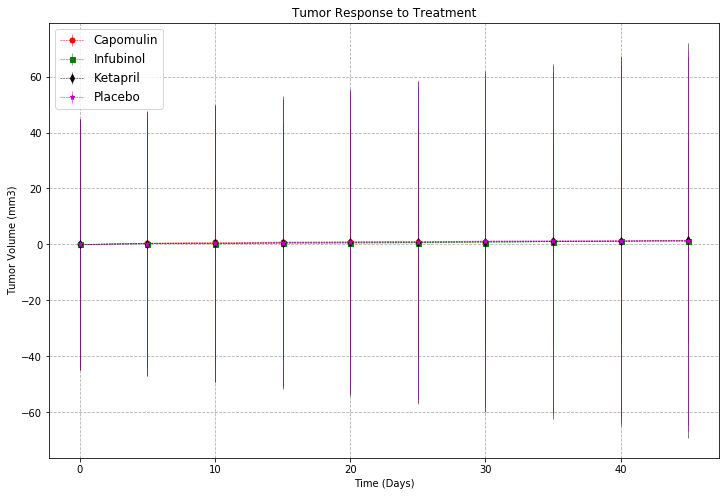

In [23]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(12,8))

plt.errorbar(pivot_mean.index, pivot_mean['Capomulin'], yerr=pivot_std['Capomulin'], label= 'Capomulin', color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean['Infubinol'],yerr=pivot_std['Infubinol'], label= 'Infubinol', color='g', marker='s', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean['Ketapril'],yerr=pivot_std['Ketapril'], label= 'Ketapril', color='k', marker='d', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean['Placebo'],yerr=pivot_std['Placebo'], label= 'Placebo', color='m', marker='*', markersize=5, linestyle='dashed', linewidth=0.50)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.grid(linestyle='dashed')
plt.legend(loc='upper left', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig('Tumor Response to Treatment.png')

In [24]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [25]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastaticSitesByDrug = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()
# Convert to DataFrame
metastaticSitesByDrug= pd.DataFrame(metastaticSitesByDrug).reset_index()
# Preview DataFrame
metastaticSitesByDrug.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [26]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stdErrorMetastaticSites = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()
# Convert to DataFrame
stdErrorMetastaticSites = pd.DataFrame(stdErrorMetastaticSites).reset_index()
# Preview DataFrame
stdErrorMetastaticSites.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [27]:
# Minor Data Munging to Re-Format the Data Frames
# Standard Error
reformat_met_site_sem = stdErrorMetastaticSites.reset_index()
pivot_met_site_sem = reformat_met_site_sem.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pivot_met_site_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [28]:
# Minor Data Munging to Re-Format the Data Frames
# Standard Error
reformat_met_site_sem = stdErrorMetastaticSites.reset_index()
pivot_met_site_sem = reformat_met_site_sem.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
pivot_met_site_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


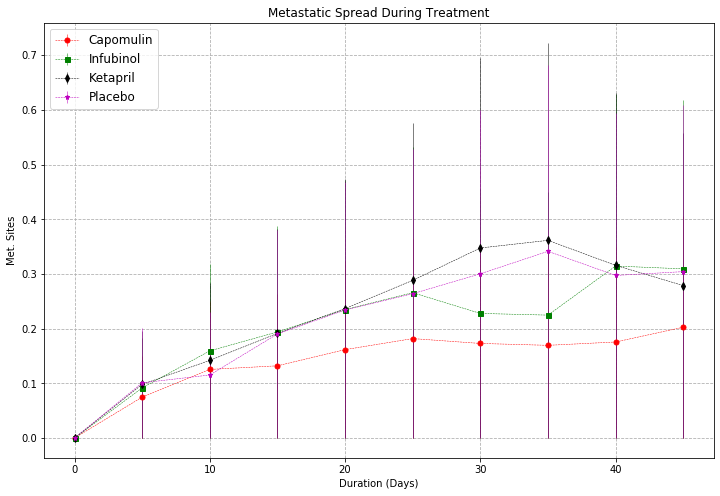

In [29]:
# Generate the Plot (with Error Bars)
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(12,8))

plt.errorbar(pivot_met_site_sem.index, pivot_met_site_sem['Capomulin'], yerr=pivot_met_site_sem['Capomulin'], label= 'Capomulin', color='r', marker='o', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_met_site_sem.index, pivot_met_site_sem['Infubinol'],yerr=pivot_met_site_sem['Infubinol'], label= 'Infubinol', color='g', marker='s', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_met_site_sem.index, pivot_met_site_sem['Ketapril'],yerr=pivot_met_site_sem['Ketapril'], label= 'Ketapril', color='k', marker='d', markersize=5, linestyle='dashed', linewidth=0.50)
plt.errorbar(pivot_met_site_sem.index, pivot_met_site_sem['Placebo'],yerr=pivot_met_site_sem['Placebo'], label= 'Placebo', color='m', marker='*', markersize=5, linestyle='dashed', linewidth=0.50)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Duration (Days)')
plt.ylabel('Met. Sites')

plt.grid(linestyle='dashed')
plt.legend(loc='upper left', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig('Metastatic Spread During Treatment.png')

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [30]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouseSurvival = mouseTrialsDF.groupby(["Drug", "Timepoint"])['Mouse ID'].count()

# Convert to DataFrame
mouseSurvival = pd.DataFrame(mouseSurvival).reset_index()
mouseSurvival = mouseSurvival.rename(columns = {"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouseSurvival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [31]:
# Minor Data Munging to Re-Format the Data Frames
mouseSurvivalByTime = mouseSurvival.pivot (index = "Timepoint", columns="Drug", values="Mouse Count")
# Preview the Data Frame
mouseSurvivalByTime

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


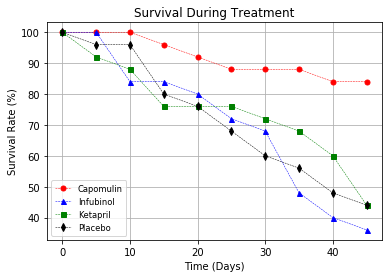

In [32]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mouseSurvivalByTime['Capomulin'] / 25, 'ro', label= 'Capomulin', markersize=5, linestyle='dashed', linewidth=0.50)
plt.plot(100 * mouseSurvivalByTime['Infubinol'] / 25, 'b^', label= 'Infubinol', markersize=5, linestyle='dashed', linewidth=0.50)
plt.plot(100 * mouseSurvivalByTime['Ketapril'] / 25, 'gs', label= 'Ketapril', markersize=5, linestyle='dashed', linewidth=0.50)
plt.plot(100 * mouseSurvivalByTime['Placebo'] / 25, 'kd', label= 'Placebo', markersize=5, linestyle='dashed', linewidth=0.50)

plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')

plt.grid(True)
plt.legend(loc='bottom left', fontsize='small', fancybox=True)

# Save the Figure
plt.savefig('Survival During Treatment.png')

# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [33]:
# Calculate the percent changes for each drug
percentChangeStudyPeriod = (pivot_std.iloc[9, :] - pivot_std.iloc[0,:])/pivot_std.iloc[0,:] * 100

# Display the data to confirm
print(percentChangeStudyPeriod)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


In [34]:
percentChange = percentChangeStudyPeriod.to_frame()
percentChange = percentChange.rename(columns = {0 : "Percent Change"})
percentChange["Pass"] = (percentChange < 0)

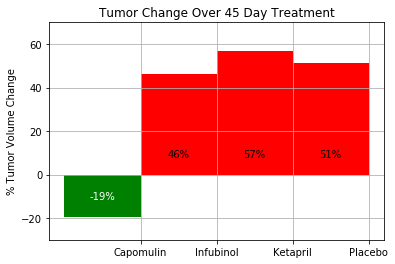

In [35]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (percentChangeStudyPeriod['Capomulin'],
                   percentChangeStudyPeriod['Infubinol'],
                   percentChangeStudyPeriod['Ketapril'],
                   percentChangeStudyPeriod['Placebo'])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))  
width = 1
passing = ax.bar(ind[0], percent_changes[0], width, color='green')
failing = ax.bar(ind[1:], percent_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelPassing(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -12, 
                '%d%%' % int(height), 
                ha='center', va='bottom', color="white")
        
def autolabelFailing(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 7, 
                '%d%%' % int(height), 
                ha='center', va='bottom', color="black")

# Call functions to implement the function calls
autolabelPassing(passing)
autolabelFailing(failing)

# Save the Figure
fig.savefig('Tumor Changes Over 45 Day Treatment.png')

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)